In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split 

#read data
data=pd.read_csv(r"C:\Users\Rebecca\Downloads\London Housing Dataset.csv")
data.tail(10)

,date,area,average_price,code,houses_sold,no_of_crimes
13539,4/1/2019,england,245077,E92000001,59710.0,NaN
13540,5/1/2019,england,245255,E92000001,65387.0,NaN
13541,6/1/2019,england,246140,E92000001,66723.0,NaN
13542,7/1/2019,england,248562,E92000001,70681.0,NaN
13543,8/1/2019,england,249432,E92000001,75079.0,NaN
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN
13548,1/1/2020,england,247355,E92000001,NaN,NaN


# Cleaning the Data

In [5]:
#check if there is any missing values/Nan Values
#data.isnull()

#instead of deleting nan values we can replace them with 0 using fillna
data['houses_sold'].fillna('0',inplace=True)
data.tail(10)

data['no_of_crimes'].fillna('0',inplace=True)
data.tail(10)

#checking the datatypes
data.dtypes

#converting data type from string to float
data['houses_sold']=data['houses_sold'].astype(float)
data.tail(10)

,date,area,average_price,code,houses_sold,no_of_crimes
13539,4/1/2019,england,245077,E92000001,59710.0,0
13540,5/1/2019,england,245255,E92000001,65387.0,0
13541,6/1/2019,england,246140,E92000001,66723.0,0
13542,7/1/2019,england,248562,E92000001,70681.0,0
13543,8/1/2019,england,249432,E92000001,75079.0,0
13544,9/1/2019,england,249942,E92000001,64605.0,0
13545,10/1/2019,england,249376,E92000001,68677.0,0
13546,11/1/2019,england,248515,E92000001,67814.0,0
13547,12/1/2019,england,250410,E92000001,0.0,0
13548,1/1/2020,england,247355,E92000001,0.0,0


# Analysing the data

# 1.What is the highest number of houses sold? Which year?

In [6]:
#data['houses_sold'].max()

print(data[data.houses_sold == data.houses_sold.max()])

           date     area  average_price       code  houses_sold no_of_crimes
13336  5/1/2002  england         104458  E92000001     132163.0            0


# 2. what is the lowest number of houses sold? which year?

In [7]:
data.head(10)
print(data[data.houses_sold == 2])

          date            area  average_price       code  houses_sold  \
166  11/1/2008  city of london         396155  E09000001          2.0   

    no_of_crimes  
166          0.0  


# 3.	Highest price of house sold, which area?

In [8]:
print(data[data.average_price == data.average_price.max()])

          date                    area  average_price       code  houses_sold  \
6001  1/1/2018  kensington and chelsea        1463378  E09000020        129.0   

     no_of_crimes  
6001       1737.0  


# 4. Lowest price of house sold,which area 

In [9]:
print(data[data.average_price == data.average_price.min()])

           date        area  average_price       code  houses_sold  \
10553  2/1/1996  north east          40722  E12000001       2113.0   

      no_of_crimes  
10553            0  


# 5. Which area of London had the highest crimes?

In [10]:
data.head(10)
#convert data to float
data['no_of_crimes']= data['no_of_crimes'].astype(float)

print(data[data.no_of_crimes == data.no_of_crimes.max()])

           date         area  average_price       code  houses_sold  \
9936  12/1/2019  westminster         968404  E09000033          0.0   

      no_of_crimes  
9936        7461.0  


# 6.Which area of London had the lowest crimes?

In [11]:
print(data[data.no_of_crimes == 3])

         date            area  average_price       code  houses_sold  \
150  7/1/2007  city of london         467348  E09000001         32.0   

     no_of_crimes  
150           3.0  


# 9.	Can we predict which area of London will have the highest sales in future

In [12]:
data.tail(10)

,date,area,average_price,code,houses_sold,no_of_crimes
13539,4/1/2019,england,245077,E92000001,59710.0,0.0
13540,5/1/2019,england,245255,E92000001,65387.0,0.0
13541,6/1/2019,england,246140,E92000001,66723.0,0.0
13542,7/1/2019,england,248562,E92000001,70681.0,0.0
13543,8/1/2019,england,249432,E92000001,75079.0,0.0
13544,9/1/2019,england,249942,E92000001,64605.0,0.0
13545,10/1/2019,england,249376,E92000001,68677.0,0.0
13546,11/1/2019,england,248515,E92000001,67814.0,0.0
13547,12/1/2019,england,250410,E92000001,0.0,0.0
13548,1/1/2020,england,247355,E92000001,0.0,0.0


<Axes: xlabel='average_price', ylabel='no_of_crimes'>

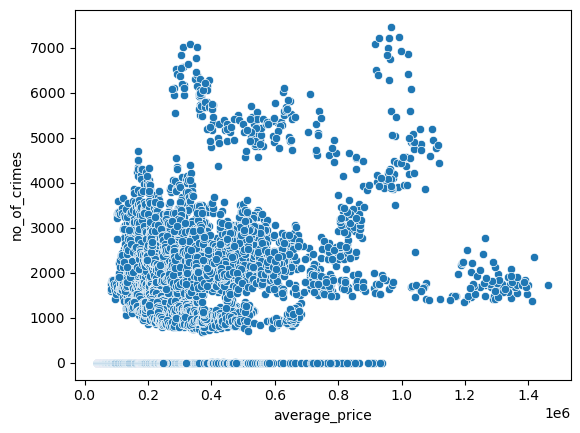

In [13]:
#using seaborn to create a scatter plot
sns.scatterplot(x='average_price',y='no_of_crimes',data=data)

<Axes: xlabel='average_price', ylabel='no_of_crimes'>

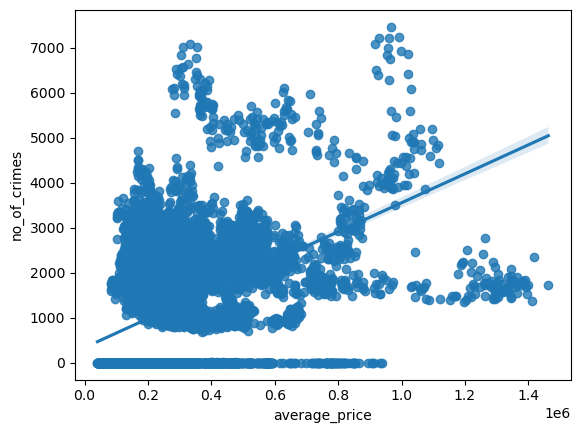

In [14]:
sns.regplot(x='average_price',y='no_of_crimes',data=data)


Text(0, 0.5, 'Predicted Y')

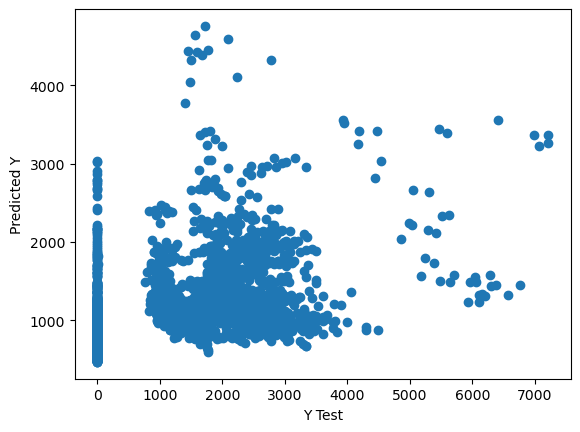

In [24]:
data.tail(10)
X=data[['average_price']]
y=data[['no_of_crimes']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

#making prediction
# Prediction result
predictions = model.predict(X_test)

#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_2528\2747667862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins = 50)


<Axes: ylabel='Density'>

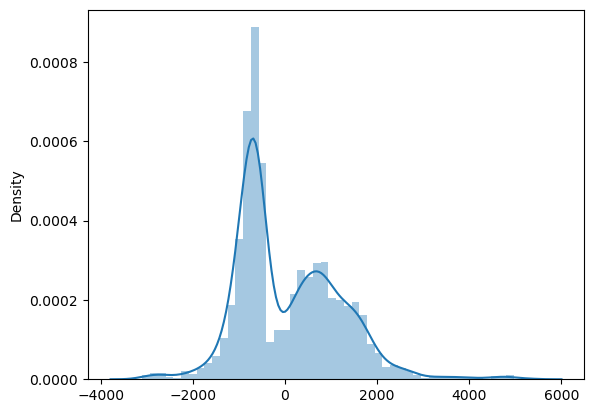

In [25]:
sns.distplot((y_test-predictions), bins = 50)

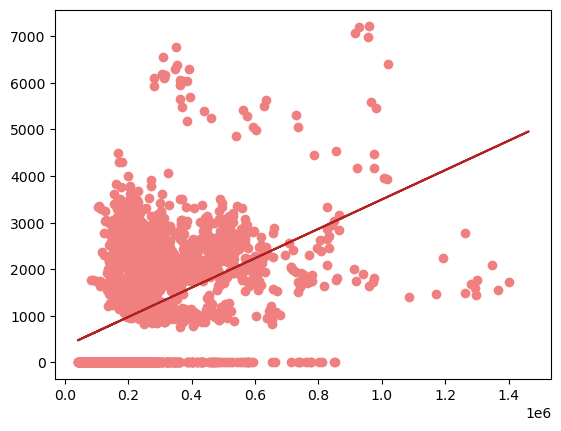

In [19]:
#test prediction data
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')